<a href="https://colab.research.google.com/github/linneverh/Sust-Finance/blob/main/assignment_1__Q4_finance_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Allocation based on Financial Performance

In [2]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import dataset from git
url_DS_ESGScore_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_ESGScore_Y.csv'
DS_ESGScore_Y = pd.read_csv(url_DS_ESGScore_Y)

url_DS_EScore_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_EScore_Y.csv'
DS_EScore_Y = pd.read_csv(url_DS_EScore_Y)

url_DS_MV_USD_M = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_MV_USD_M.csv'
DS_MV_USD_M = pd.read_csv(url_DS_MV_USD_M)

url_DS_MV_USD_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_MV_USD_Y.csv'
DS_MV_USD_Y = pd.read_csv(url_DS_MV_USD_M)

url_DS_REV_USD_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_REV_USD_Y.csv'
DS_REV_USD_Y = pd.read_csv(url_DS_REV_USD_Y)

url_DS_RI_USD_M = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_RI_USD_M.csv'
DS_RI_USD_M = pd.read_csv(url_DS_RI_USD_M)

url_DS_RI_USD_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_RI_USD_Y.csv'
DS_RI_USD_Y = pd.read_csv(url_DS_RI_USD_M)

url_Risk_Free_Rate = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/Risk_Free_Rate.csv'
Risk_Free_Rate = pd.read_csv(url_Risk_Free_Rate)

url_Static = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/Static.csv'
Static = pd.read_csv(url_Static)


<ipython-input-3-c9f8fe89ee9e>:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  DS_MV_USD_M = pd.read_csv(url_DS_MV_USD_M)
<ipython-input-3-c9f8fe89ee9e>:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  DS_MV_USD_Y = pd.read_csv(url_DS_MV_USD_M)


### Test data sets

In [4]:
DS_ESGScore_Y.head()

,NAME,ISIN,1999,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,SCHLUMBERGER,AN8068571086,NaN,NaN,NaN,45.63,38.22,28.43,28.74,44.83,...,57.07,55.50,69.43,68.12,71.38,71.32,71.02,77.28,76.14,74.04
1,ALUAR,ARALUA010258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.39,10.77,13.69,13.88,15.60,14.29,28.84
2,BANCO BBVA ARGENTINA,ARP125991090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,42.63,61.57,76.33,77.40,72.25,83.24,80.37,81.20
3,TERNIUM ARGENTINA SOCIEDAD ANONIMA,ARSIDE010029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,41.27,45.71,45.15,44.16,43.86,43.77,46.04,59.77
4,STRABAG SE,AT000000STR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.04,51.45,53.53,63.88,70.02,69.13,67.10,70.65,69.79,67.15


In [5]:
DS_EScore_Y.head()

,NAME,ISIN,1999,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,SCHLUMBERGER,AN8068571086,NaN,NaN,NaN,53.65,23.33,0.0,0.0,40.7,...,75.71,71.54,73.65,85.28,81.96,80.74,79.07,88.53,86.85,82.05
1,ALUAR,ARALUA010258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,15.82,13.26,12.26,11.05,13.19,12.21,17.65
2,BANCO BBVA ARGENTINA,ARP125991090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,51.51,56.64,76.16,84.68,82.48,88.36,86.99,79.68
3,TERNIUM ARGENTINA SOCIEDAD ANONIMA,ARSIDE010029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32.51,33.47,33.72,33.41,33.52,38.37,36.83,48.05
4,STRABAG SE,AT000000STR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.69,55.55,56.98,58.90,64.85,62.56,59.32,59.27,65.77,59.45


In [6]:
DS_MV_USD_M.head()

,NAME,ISIN,1999-12-31 00:00:00,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-28 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,...,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00,2025-01-31 00:00:00
0,SCHLUMBERGER,AN8068571086,30859.99,33574.85,40611.13,43352.43,43387.86,41861.39,42466.02,42074.79,...,67864.94,65592.31,67436.13,68571.81,62465.84,59239.83,56585.01,62050.05,53708.59,54774.95
1,ALUAR,ARALUA010258,1129.31,1328.64,1395.07,1362.23,1340.19,1317.78,1209.89,1395.69,...,2698.60,3165.16,3033.34,2875.18,2694.70,2494.63,2381.96,2635.60,2425.22,2291.70
2,BANCO BBVA ARGENTINA,ARP125991090,1656.3,1570.39,1851.34,1656.82,1388.70,1352.22,1541.05,1551.54,...,2435.11,3210.54,2818.34,2409.49,2832.34,2697.85,3274.73,3745.74,4516.58,5131.45
3,TERNIUM ARGENTINA SOCIEDAD ANONIMA,ARSIDE010029,1414.37,1407.47,1463.08,1460.01,1356.04,893.05,955.70,990.45,...,4340.63,5146.56,4829.15,4589.92,3971.89,3870.75,3641.89,4278.73,3903.71,3645.50
4,STRABAG SE,AT000000STR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5043.53,5210.65,4935.22,4950.74,5129.83,4947.90,4652.68,4819.74,4835.47,5800.59


## Question 1: Average annualized return and volatiliy (10 points)

Compute the annualized average return and annualized volatility for all individual assets over the period 2014–2024 based on monthly data. Plot and comment the histogram of these distributions. Compute and comment on the correlation between individual average returns and volatilities in the cross section. (10 points)


In [7]:
#CLEANING/MERGING

# Merging the data to filter per region
merged_DS_RI_USD_M = pd.merge(DS_RI_USD_M, Static, on='ISIN', how='inner')
merged_DS_RI_USD_M = merged_DS_RI_USD_M[['ISIN', 'Name', 'Country', 'Region'] + [col for col in merged_DS_RI_USD_M.columns if col not in ['ISIN', 'Name', 'Country', 'Region']]]
del(merged_DS_RI_USD_M['NAME'])

#Keeping only the columns between 30/01/04 and 31/12/24
start_date = pd.to_datetime('2003-12-31')
end_date = pd.to_datetime('2024-12-31')

# Filter columns excluding non-date columns
date_columns = [col for col in merged_DS_RI_USD_M.columns if col not in ['ISIN', 'Name', 'Country', 'Region'] and start_date <= pd.to_datetime(col, errors='ignore') <= end_date]
selected_columns = ['ISIN', 'Name', 'Country', 'Region'] + date_columns
merged_DS_RI_USD_M = merged_DS_RI_USD_M[selected_columns]
#merged_DS_RI_USD_M.head()


# Filter on EM countries
EM_merged_DS_RI_USD_M = merged_DS_RI_USD_M[merged_DS_RI_USD_M['Region'] == 'EM']
EM_merged_DS_RI_USD_M.head()



<ipython-input-7-764e14df1c49>:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  date_columns = [col for col in merged_DS_RI_USD_M.columns if col not in ['ISIN', 'Name', 'Country', 'Region'] and start_date <= pd.to_datetime(col, errors='ignore') <= end_date]


,ISIN,Name,Country,Region,2003-12-31 00:00:00,2004-01-30 00:00:00,2004-02-27 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,...,2024-03-29 00:00:00,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00
1,ARALUA010258,ALUAR,AR,EM,2369.57,2580.96,2512.72,2555.21,2286.66,1990.69,...,5760.96,5331.65,6253.43,5993.00,5680.53,5323.94,4928.66,4706.05,5207.18,4802.89
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM,164.57,169.65,168.24,168.11,132.82,103.71,...,412.77,458.42,672.82,624.64,569.69,669.66,637.87,774.26,885.63,1067.88
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM,239.35,219.84,262.63,249.92,239.81,201.36,...,1182.67,1092.52,1295.37,1215.48,1155.27,999.71,974.26,916.65,1076.94,982.55
118,BMG211591018,CHINA YURUN FOOD GROUP,CN,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,0.63,0.59,0.59,0.56,0.51,0.59,0.62,0.80,0.67,0.63
146,BRABEVACNOR1,AMBEV ON,BR,EM,170.08,171.72,191.03,249.73,272.12,287.41,...,1199.78,1127.14,1057.57,987.73,985.01,1091.85,1154.89,1049.92,1025.18,963.62


In [8]:
#RETURNS TABLE

#MONTHLY RETURNS TABLE
# idea: for annualized, sum up all months r and divide by the total number of months, multiply by 12
# for the other: annualized volatility, same thing with volatility

# Filter columns for 2014-2024
start_year = pd.to_datetime('2003-12-31')
end_year = pd.to_datetime('2024-12-31')

# Select columns within the desired date range for returns calculation
date_columns_filtered = [col for col in EM_merged_DS_RI_USD_M.columns[4:]
                         if start_year <= pd.to_datetime(col, errors='coerce') <= end_year
                         and pd.notna(pd.to_datetime(col, errors='coerce'))]  # Check for valid dates

EM_merged_DS_R_USD_M = EM_merged_DS_RI_USD_M[['ISIN', 'Name', 'Country', 'Region'] + date_columns_filtered].copy()  # Create a copy to avoid modifying the original

# Get the date columns for calculations
date_columns = EM_merged_DS_RI_USD_M.columns[4:]  # Assuming the date columns start from index 6

# Iterate through the date columns and calculate simple returns
for i in range(len(date_columns_filtered)-1):
    current_date = date_columns_filtered[i]
    next_date = date_columns_filtered[i + 1]
    # Check if the current_date value is 0
    EM_merged_DS_R_USD_M[next_date] = np.where(EM_merged_DS_RI_USD_M[current_date] != 0,#CLEANING OF THE INFINITE VALUES

                                              (EM_merged_DS_RI_USD_M[next_date] - EM_merged_DS_RI_USD_M[current_date]) / EM_merged_DS_RI_USD_M[current_date],
                                              0)  # Set return rate to 0 if current_date is 0

#Checking if the column to be dropped is present in EM_merged_DS_R_USD_M
if date_columns_filtered:
    EM_merged_DS_R_USD_M = EM_merged_DS_R_USD_M.drop(columns=[date_columns_filtered[0]])

# Now EM_merged_DS_R_USD_M contains the simple returns
EM_merged_DS_R_USD_M.head()

,ISIN,Name,Country,Region,2004-01-30 00:00:00,2004-02-27 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,...,2024-03-29 00:00:00,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00
1,ARALUA010258,ALUAR,AR,EM,0.089210,-0.026440,0.016910,-0.105099,-0.129433,-0.009585,...,0.121748,-0.074521,0.172888,-0.041646,-0.052139,-0.062774,-0.074246,-0.045166,0.106486,-0.077641
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM,0.030868,-0.008311,-0.000773,-0.209922,-0.219169,-0.056407,...,0.322091,0.110594,0.467693,-0.071609,-0.087971,0.175481,-0.047472,0.213821,0.143841,0.205786
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM,-0.081512,0.194642,-0.048395,-0.040453,-0.160335,-0.031585,...,0.158254,-0.076226,0.185672,-0.061673,-0.049536,-0.134653,-0.025457,-0.059132,0.174865,-0.087646
118,BMG211591018,CHINA YURUN FOOD GROUP,CN,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.045455,-0.063492,0.000000,-0.050847,-0.089286,0.156863,0.050847,0.290323,-0.162500,-0.059701
146,BRABEVACNOR1,AMBEV ON,BR,EM,0.009643,0.112451,0.307282,0.089657,0.056188,0.049650,...,-0.014473,-0.060544,-0.061723,-0.066038,-0.002754,0.108466,0.057737,-0.090892,-0.023564,-0.060048


In [9]:
#AVERAGE YEARLY RETURNS

# Filter columns for 2014-2024
start_year = pd.to_datetime('2014-01-31')
end_year = pd.to_datetime('2024-12-31')

# Select columns within the desired date range for returns calculation
date_columns_filtered = [col for col in EM_merged_DS_R_USD_M.columns[4:]
                         if start_year <= pd.to_datetime(col, errors='coerce') <= end_year
                         and pd.notna(pd.to_datetime(col, errors='coerce'))]  # Check for valid dates

EM_merged_DS_R_USD_M_AYR = EM_merged_DS_R_USD_M[['ISIN', 'Name', 'Country', 'Region'] + date_columns_filtered].copy()  # Create a copy to avoid modifying the original

# Calculate the mean of every data point for each company (row) across all columns
EM_merged_DS_R_USD_M_AYR['Annualized Average Return'] = EM_merged_DS_R_USD_M_AYR.iloc[:, 4:].mean(axis=1) * 12

# Display the updated DataFrame
EM_merged_DS_R_USD_M_AYR.head()

,ISIN,Name,Country,Region,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-30 00:00:00,2014-06-30 00:00:00,...,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00,Annualized Average Return
1,ARALUA010258,ALUAR,AR,EM,0.022384,-0.149263,-0.018792,0.017829,0.025300,-0.020969,...,-0.074521,0.172888,-0.041646,-0.052139,-0.062774,-0.074246,-0.045166,0.106486,-0.077641,0.232388
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM,-0.037527,0.014524,0.118945,0.159405,0.079927,0.128727,...,0.110594,0.467693,-0.071609,-0.087971,0.175481,-0.047472,0.213821,0.143841,0.205786,0.343283
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM,0.028548,-0.081548,0.023276,0.109948,-0.009297,-0.058221,...,-0.076226,0.185672,-0.061673,-0.049536,-0.134653,-0.025457,-0.059132,0.174865,-0.087646,0.237229
118,BMG211591018,CHINA YURUN FOOD GROUP,CN,EM,-0.083601,0.028655,-0.148380,-0.066756,-0.056509,-0.019712,...,-0.063492,0.000000,-0.050847,-0.089286,0.156863,0.050847,0.290323,-0.162500,-0.059701,-0.139865
146,BRABEVACNOR1,AMBEV ON,BR,EM,-0.081488,0.087626,0.039537,-0.021640,-0.030519,0.011256,...,-0.060544,-0.061723,-0.066038,-0.002754,0.108466,0.057737,-0.090892,-0.023564,-0.060048,-0.036432


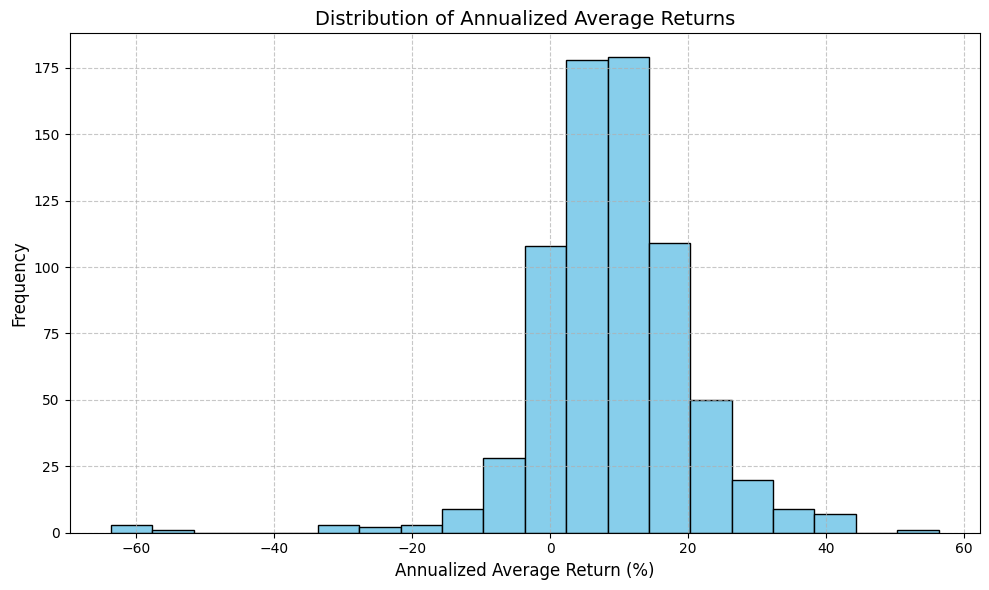

In [10]:
#HISTOGRAM AAR

# Drop rows with NaN values in 'Annualized Average Return'
EM_merged_DS_R_USD_M_AYR = EM_merged_DS_R_USD_M_AYR.dropna(subset=['Annualized Average Return'])

#Plot histogram
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
plt.hist(EM_merged_DS_R_USD_M_AYR['Annualized Average Return'] * 100, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Annualized Average Return (%)', fontsize=12)  # Increase font size
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Annualized Average Returns', fontsize=14)  # Increase font size
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

In [11]:
#VOLATILITY

T=120

# Calculate volatility for each asset
volatilities = []
for i in range(EM_merged_DS_R_USD_M_AYR.shape[0]): # Iterate using numerical index
    R_p_t = EM_merged_DS_R_USD_M_AYR.iloc[i, 4:].values  # Returns for the asset
    mu_p = np.mean(R_p_t)  # Mean return for the asset
    sigma = np.sqrt((1 / T) * np.sum((R_p_t - mu_p) ** 2))  # Volatility calculation
    volatilities.append(sigma)

# Add the volatility column to the DataFrame
EM_merged_DS_R_USD_M_AYR['Volatility'] = volatilities
EM_merged_DS_R_USD_M_AYR.head()

,ISIN,Name,Country,Region,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-30 00:00:00,2014-06-30 00:00:00,...,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00,Annualized Average Return,Volatility
1,ARALUA010258,ALUAR,AR,EM,0.022384,-0.149263,-0.018792,0.017829,0.025300,-0.020969,...,0.172888,-0.041646,-0.052139,-0.062774,-0.074246,-0.045166,0.106486,-0.077641,0.232388,0.172436
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM,-0.037527,0.014524,0.118945,0.159405,0.079927,0.128727,...,0.467693,-0.071609,-0.087971,0.175481,-0.047472,0.213821,0.143841,0.205786,0.343283,0.198981
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM,0.028548,-0.081548,0.023276,0.109948,-0.009297,-0.058221,...,0.185672,-0.061673,-0.049536,-0.134653,-0.025457,-0.059132,0.174865,-0.087646,0.237229,0.169678
118,BMG211591018,CHINA YURUN FOOD GROUP,CN,EM,-0.083601,0.028655,-0.148380,-0.066756,-0.056509,-0.019712,...,0.000000,-0.050847,-0.089286,0.156863,0.050847,0.290323,-0.162500,-0.059701,-0.139865,0.187857
146,BRABEVACNOR1,AMBEV ON,BR,EM,-0.081488,0.087626,0.039537,-0.021640,-0.030519,0.011256,...,-0.061723,-0.066038,-0.002754,0.108466,0.057737,-0.090892,-0.023564,-0.060048,-0.036432,0.092097


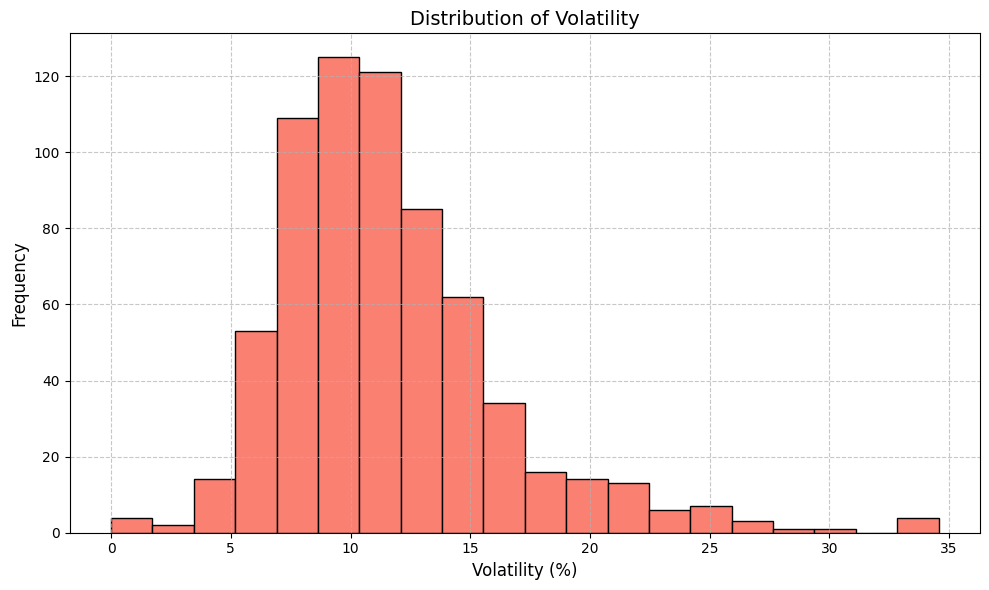

In [12]:
#HISTOGRAM FOR VOLATILITY

plt.figure(figsize=(10, 6))
plt.hist(EM_merged_DS_R_USD_M_AYR['Volatility'] * 100, bins=20, color='salmon', edgecolor='black')
plt.xlabel('Volatility (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Volatility', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Correlation between Annualized Average Return and Volatility: 0.056183772253159334


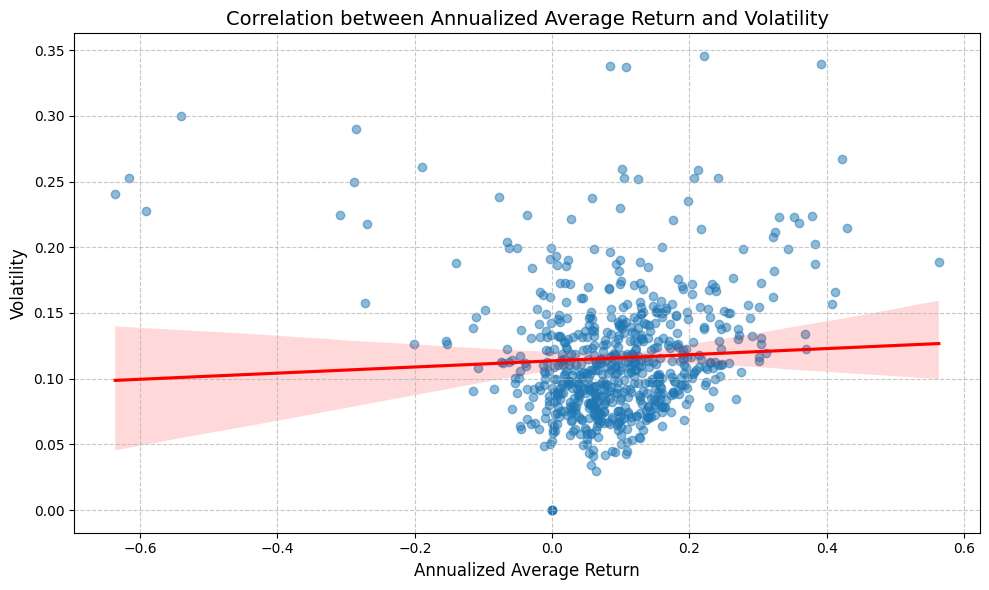

In [13]:
#CORRELATION AAR AND VOLATILITY

# Calculate the correlation
correlation = EM_merged_DS_R_USD_M_AYR['Annualized Average Return'].corr(EM_merged_DS_R_USD_M_AYR['Volatility'])

# Print the correlation
print(f"Correlation between Annualized Average Return and Volatility: {correlation}")

# Create a scatter plot with a correlation line using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Annualized Average Return', y='Volatility', data=EM_merged_DS_R_USD_M_AYR,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})  # Add correlation line
plt.xlabel('Annualized Average Return', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.title('Correlation between Annualized Average Return and Volatility', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Question 2: Equally-weighted/market-cap (value) weighted portfolios (15 points)

## Question 3: Efficient frontier (35 points)

## Question 4: Minimum variance portfolio (40 points)

In [14]:
#MEEEEEERGE

## Merging the EScore to EM
# Merging the data to filter per region
merged_DS_EScore_Y = pd.merge(DS_EScore_Y, Static, on='ISIN', how='inner')
merged_DS_EScore_Y = merged_DS_EScore_Y[['ISIN', 'Name', 'Region'] + [col for col in merged_DS_EScore_Y.columns if col not in ['ISIN', 'Name', 'Region', 'NAME']]]

#Keeping only the columns between 31/12/03 and 31/12/23
start_date = pd.to_datetime('2002-12-31')
end_date = pd.to_datetime('2023-12-31')

# Filter columns excluding non-date columns
date_columns = [col for col in merged_DS_EScore_Y.columns if col not in ['ISIN', 'Name', 'Country', 'Region'] and start_date <= pd.to_datetime(col, errors='ignore') <= end_date]
selected_columns = ['ISIN', 'Name', 'Country', 'Region'] + date_columns
merged_DS_EScore_Y = merged_DS_EScore_Y[selected_columns]


# Filter on EM countries
EM_merged_DS_EScore_Y = merged_DS_EScore_Y[merged_DS_EScore_Y['Region'] == 'EM']
EM_merged_DS_EScore_Y

<ipython-input-14-e9c1a75537b8>:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  date_columns = [col for col in merged_DS_EScore_Y.columns if col not in ['ISIN', 'Name', 'Country', 'Region'] and start_date <= pd.to_datetime(col, errors='ignore') <= end_date]


,ISIN,Name,Country,Region,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,ARALUA010258,ALUAR,AR,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,15.82,13.26,12.26,11.05,13.19,12.21,17.65
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,51.51,56.64,76.16,84.68,82.48,88.36,86.99,79.68
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32.51,33.47,33.72,33.41,33.52,38.37,36.83,48.05
118,BMG211591018,CHINA YURUN FOOD GROUP,CN,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,17.85,36.12,45.19,48.35,52.97,63.43,53.70,47.78
145,BRABEVACNOR1,AMBEV ON,BR,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,58.81,66.63,74.17,67.08,55.27,68.85,72.11,77.48,67.51,62.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,ZAE000191342,ALTRON LIMITED A,ZA,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,54.31,56.78,59.55,57.53,30.93,30.08,27.51,38.62,31.87,37.06
2504,ZAE000255915,ABSA GROUP,ZA,EM,NaN,NaN,NaN,NaN,NaN,55.21,...,55.56,68.94,75.90,81.90,80.63,83.03,81.99,81.45,79.12,84.75
2505,ZAE000298253,NORTHAM PLATINUM HLDGS,ZA,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,54.03,52.42,56.64,53.90,63.37,62.03,67.79,73.50,74.37,63.96
2506,ZAE000302618,AVENG,ZA,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,64.66,69.09,70.85,52.33,45.73,44.32,44.52,48.95,31.21,25.61


In [32]:
## Merging EScore w. EM w. Return

common_ISINs = EM_merged_DS_EScore_Y['ISIN'].unique()
filtered_EM_merged_DS_R_USD_M = EM_merged_DS_R_USD_M[EM_merged_DS_R_USD_M['ISIN'].isin(common_ISINs)]
filtered_EM_merged_DS_R_USD_M

,ISIN,Name,Country,Region,2004-01-30 00:00:00,2004-02-27 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,...,2024-03-29 00:00:00,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00
1,ARALUA010258,ALUAR,AR,EM,0.089210,-0.026440,0.016910,-0.105099,-0.129433,-0.009585,...,0.121748,-0.074521,0.172888,-0.041646,-0.052139,-0.062774,-0.074246,-0.045166,0.106486,-0.077641
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM,0.030868,-0.008311,-0.000773,-0.209922,-0.219169,-0.056407,...,0.322091,0.110594,0.467693,-0.071609,-0.087971,0.175481,-0.047472,0.213821,0.143841,0.205786
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM,-0.081512,0.194642,-0.048395,-0.040453,-0.160335,-0.031585,...,0.158254,-0.076226,0.185672,-0.061673,-0.049536,-0.134653,-0.025457,-0.059132,0.174865,-0.087646
118,BMG211591018,CHINA YURUN FOOD GROUP,CN,EM,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.045455,-0.063492,0.000000,-0.050847,-0.089286,0.156863,0.050847,0.290323,-0.162500,-0.059701
146,BRABEVACNOR1,AMBEV ON,BR,EM,0.009643,0.112451,0.307282,0.089657,0.056188,0.049650,...,-0.014473,-0.060544,-0.061723,-0.066038,-0.002754,0.108466,0.057737,-0.090892,-0.023564,-0.060048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,ZAE000191342,ALTRON LIMITED A,ZA,EM,-0.064573,0.077699,0.098421,-0.062575,0.076836,0.137826,...,0.082942,0.040944,0.127626,0.080433,0.316925,0.012633,0.048533,0.034932,0.097795,0.007029
2561,ZAE000255915,ABSA GROUP,ZA,EM,-0.007591,0.120405,0.054265,-0.128764,0.140361,0.141200,...,-0.082512,0.036311,0.025936,0.095224,0.012335,0.127532,0.070606,-0.063144,0.001226,0.053002
2562,ZAE000298253,NORTHAM PLATINUM HLDGS,ZA,EM,0.153425,-0.009501,0.026379,-0.170561,0.025352,0.010989,...,0.052891,0.113964,0.037187,0.011843,0.124900,-0.242873,0.072477,0.164121,-0.154704,-0.170888
2563,ZAE000302618,AVENG,ZA,EM,-0.065779,-0.087689,0.048295,-0.118338,0.126537,0.007731,...,-0.166667,0.000000,0.000000,0.200000,0.333333,0.125000,0.000000,-0.111111,0.250000,0.000000


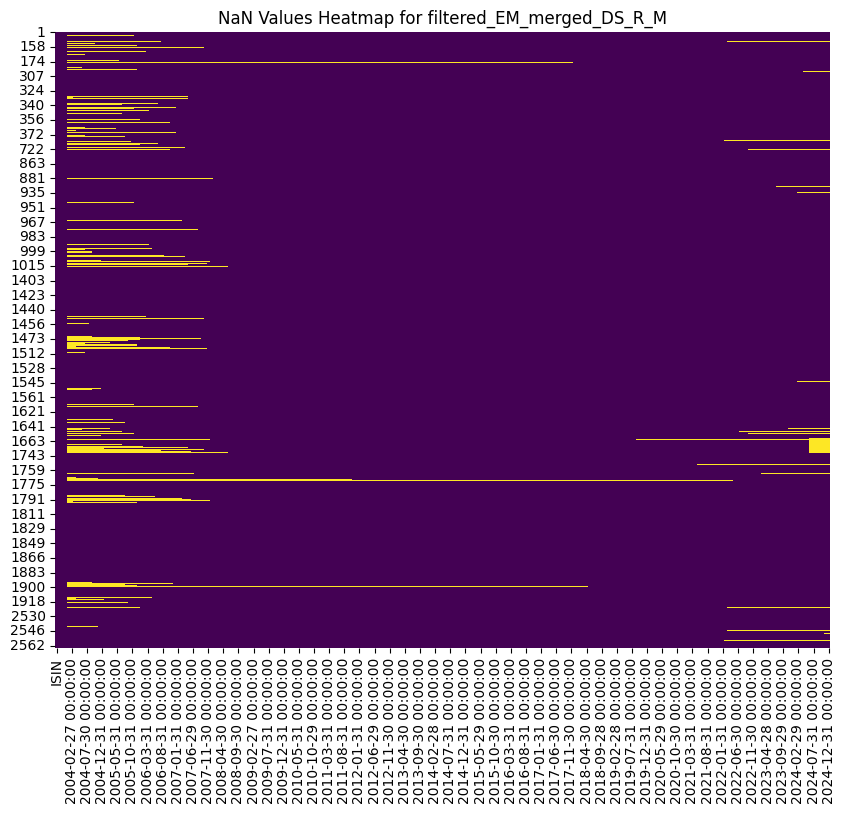

In [33]:
# prompt: make a heat map for the NaN values in filtered_EM_merged_DS_R_M

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of NaN values
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_EM_merged_DS_R_USD_M.isnull(), cbar=False, cmap='viridis')
plt.title('NaN Values Heatmap for filtered_EM_merged_DS_R_M')
plt.show()


In [37]:
import pandas as pd

def clean_data(dataframe):
    """
    Cleans the input DataFrame according to the specified rules:

    1. If a row in 2014 does not have at least 5 years of prior data (no NaN values), it is deleted.
    2. If there is a single missing value between existing data points, it is replaced with 0.
    3. If a missing value appears after 2014, it is filled with the average value of the available period before the actual date.
    """

    # Convert date columns to datetime format
    date_columns = dataframe.columns[4:]
    dataframe.columns = dataframe.columns[:4].tolist() + pd.to_datetime(date_columns, errors='coerce').tolist()

    dataframe = dataframe.copy()  # Avoid modifying original DataFrame

    # 1. Delete rows without 5 years of prior data in 2014
    try:
        year_2014_index = dataframe.columns.get_loc(pd.Timestamp('2014-12-31'))
    except KeyError:
        print("Warning: '2014-12-31' not found in columns. Skipping step 1.")
        year_2014_index = None

    if year_2014_index is not None:
        prior_years = 5 * 12  # Assuming monthly data
        if year_2014_index >= prior_years:
            dataframe = dataframe[
                dataframe.iloc[:, year_2014_index - prior_years: year_2014_index].notna().sum(axis=1) == prior_years
            ]

    # 2. Replace single missing values between existing data points with 0
    for index in range(len(dataframe)):
        row = dataframe.iloc[index, 4:]  # Extract only the date columns
        for i in range(1, len(row) - 1):
            if pd.isna(row.iloc[i]) and not pd.isna(row.iloc[i - 1]) and not pd.isna(row.iloc[i + 1]):
                dataframe.iloc[index, i + 4] = 0  # Offset by 4 to match original indexing

  # 3. Handle NaNs at the end of the row **only if they occur after 2014**
    if year_2014_index is not None:
       for index in range(len(dataframe)):
            row = dataframe.iloc[index, year_2014_index + 1:]  # Consider only post-2014 data
            nan_indices = row[row.isna()].index

            if not nan_indices.empty:
                first_nan_index = nan_indices[0]  # First NaN occurrence

                # Set first NaN to -1
                dataframe.iloc[index, dataframe.columns.get_loc(first_nan_index)] = -1

                # Fill remaining NaNs with 0
                dataframe.iloc[index, dataframe.columns.get_loc(first_nan_index) + 1:] = dataframe.iloc[index, dataframe.columns.get_loc(first_nan_index) + 1:].fillna(0)

    return dataframe

In [38]:
# Apply the cleaning function to our dataframe
filtered_EM_merged_DS_R_USD_M = clean_data(filtered_EM_merged_DS_R_USD_M)

<ipython-input-37-540f52f3344d>:52: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.iloc[index, dataframe.columns.get_loc(first_nan_index) + 1:] = dataframe.iloc[index, dataframe.columns.get_loc(first_nan_index) + 1:].fillna(0)
<ipython-input-37-540f52f3344d>:52: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.iloc[index, dataframe.columns.get_loc(first_nan_index) + 1:] = dataframe.iloc[index, dataframe.columns.get_loc(first_nan_index) + 1:].fillna(0)
<ipython-input-37-540f52f3344d>:52: FutureWarning: Downcasting object dtype arrays on .f

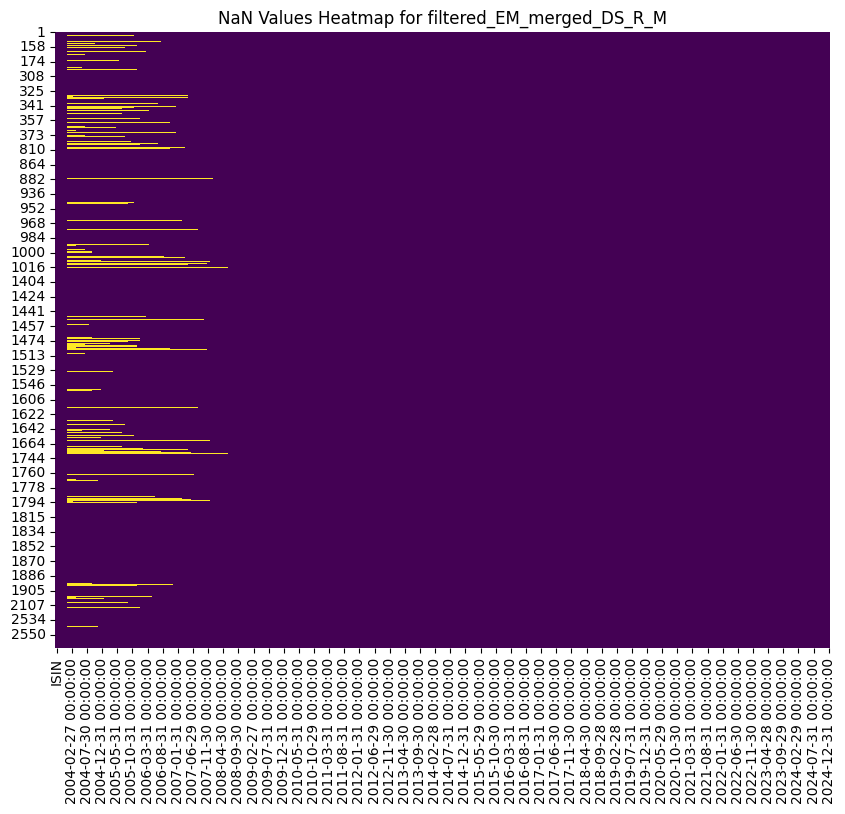

In [39]:
#heat map for the NaN values in filtered_EM_merged_DS_R_M

import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of NaN values
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_EM_merged_DS_R_USD_M.isnull(), cbar=False, cmap='viridis')
plt.title('NaN Values Heatmap for filtered_EM_merged_DS_R_M')
plt.show()

In [43]:
def compute_statistics(returns_df, year, window=60):
    """
    Compute expected returns and covariance matrix using past `window` months.

    Parameters:
    returns_df (pd.DataFrame): DataFrame of asset returns with datetime index.
    year (int): Year for which we compute expected returns and covariance.
    window (int): Number of months of past data to use (default = 5 years of monthly data).

    Returns:
    tuple: (expected returns, covariance matrix)
    """
    # Convert date columns to datetime if they are not already
    date_columns = returns_df.columns[4:]
    returns_df.columns = returns_df.columns[:4].tolist() + pd.to_datetime(date_columns, errors='coerce').tolist()

    # Define the training period: past 60 months ending in December of `year`
    end_date = pd.to_datetime(f"{year}-12-31")
    start_date = end_date - pd.DateOffset(months=window - 1)

    # Select the past `window` months of returns
    # Filter by date range
    # Convert columns to Timestamp objects for comparison
    past_returns = returns_df[[c for c in returns_df.columns[4:]
                                if start_date <= pd.Timestamp(c) <= end_date]]  # Convert c to Timestamp

    # If no columns match the date range, raise a ValueError
    if past_returns.empty:
        raise ValueError(f"No columns found in the specified date range: {start_date} to {end_date}")

    # Remove the first four columns (non-date columns)
    past_returns = past_returns.iloc[:, 4:]

    # Calculate tau (window size)
    tau = len(past_returns.columns)

    # Compute expected returns
    mu_Y_plus_1 = (1 / tau) * past_returns.sum(axis=1)

    # Compute covariance matrix
    deviations = past_returns.sub(mu_Y_plus_1, axis=0)
    Sigma_Y_plus_1 = (deviations.T @ deviations) / tau

    return mu_Y_plus_1, Sigma_Y_plus_1


In [45]:
year = 2016
expected_returns, covariance_matrix = compute_statistics(filtered_EM_merged_DS_R_USD_M, year)

# Display results
print(f"Expected Returns for {year + 1}:\n", expected_returns)
print(f"\nCovariance Matrix for {year + 1}:\n", covariance_matrix)

Expected Returns for 2017:
 1       0.016140
2       0.030769
3       0.025386
118    -0.029056
146    -0.000818
          ...   
2560   -0.018549
2561   -0.000349
2562    0.004378
2563   -0.025280
2564   -0.004136
Length: 671, dtype: float64

Covariance Matrix for 2017:
                      2012-05-31  2012-06-29  2012-07-31  2012-08-31  \
2012-05-31 00:00:00    0.226812   -0.092166   -0.000216   -0.013517   
2012-06-29 00:00:00   -0.092166    0.138468    0.007288    0.016517   
2012-07-31 00:00:00   -0.000216    0.007288    0.082062   -0.004810   
2012-08-31 00:00:00   -0.013517    0.016517   -0.004810    0.083613   
2012-09-28 00:00:00   -0.116374    0.055798   -0.014229    0.002237   
2012-10-31 00:00:00    0.014271    0.006073    0.007228   -0.002644   
2012-11-30 00:00:00   -0.015133    0.003010   -0.002163   -0.002176   
2012-12-31 00:00:00   -0.085195    0.025905   -0.021943   -0.003554   
2013-01-31 00:00:00   -0.040241    0.018428   -0.001917   -0.009209   
2013-02-28 00:00: